In [1]:
!pip install yfinance

     ---------------------------------------- 0.0/3.0 MB ? eta -:--:--
     ---- ----------------------------------- 0.3/3.0 MB 19.8 MB/s eta 0:00:01
     -------------- ------------------------- 1.1/3.0 MB 13.4 MB/s eta 0:00:01
     ----------------------- ---------------- 1.7/3.0 MB 13.8 MB/s eta 0:00:01
     -------------------------- ------------- 1.9/3.0 MB 11.3 MB/s eta 0:00:01
     ----------------------------------- ---- 2.6/3.0 MB 13.8 MB/s eta 0:00:01
     ---------------------------------------  2.9/3.0 MB 11.8 MB/s eta 0:00:01
     ---------------------------------------  2.9/3.0 MB 11.8 MB/s eta 0:00:01
     ---------------------------------------- 3.0/3.0 MB 9.0 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.tom

In [35]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [60]:
df = yf.download('AAPL', start='2004-01-01', end='2024-04-15')

[*********************100%%**********************]  1 of 1 completed


In [61]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2004-01-02,0.384821,0.388393,0.378214,0.380000,0.321272,144642400
2004-01-05,0.382500,0.399821,0.382500,0.395893,0.334709,395018400
2004-01-06,0.397321,0.400357,0.387679,0.394464,0.333501,509348000
2004-01-07,0.394643,0.407679,0.391607,0.403393,0.341050,586874400
2004-01-08,0.407857,0.423750,0.404464,0.417143,0.352675,460303200
...,...,...,...,...,...,...
2024-04-08,169.029999,169.199997,168.240005,168.449997,168.221832,37425500
2024-04-09,168.699997,170.080002,168.350006,169.669998,169.440170,42451200
2024-04-10,168.800003,169.089996,167.110001,167.779999,167.552734,49709300


In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5104 entries, 2004-01-02 to 2024-04-12
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       5104 non-null   float64
 1   High       5104 non-null   float64
 2   Low        5104 non-null   float64
 3   Close      5104 non-null   float64
 4   Adj Close  5104 non-null   float64
 5   Volume     5104 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 279.1 KB


<Axes: xlabel='Date'>

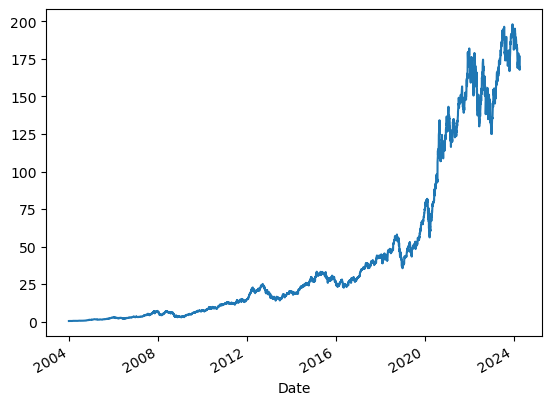

In [63]:
df['Close'].plot()

In [64]:
from statsmodels.tsa.stattools import adfuller

#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(sales):
    result=adfuller(sales)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")
    


In [65]:
adfuller_test(df['Close'])

ADF Test Statistic : 1.0311254767948643
p-value : 0.9945837403339616
#Lags Used : 33
Number of Observations Used : 5070
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [66]:
df['Close First Difference'] = df['Close'] - df['Close'].shift(1)

<Axes: xlabel='Date'>

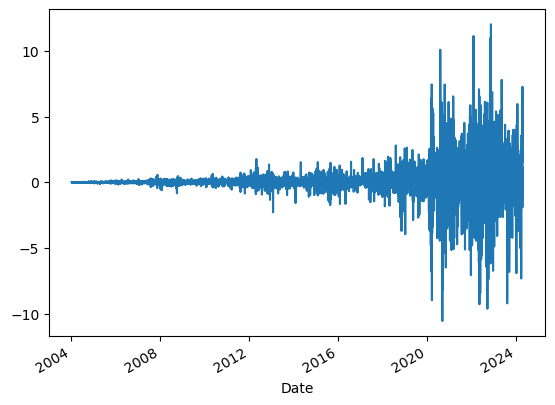

In [67]:
df['Close First Difference'].plot()

In [68]:
adfuller_test(df['Close First Difference'].dropna())

ADF Test Statistic : -13.215176953277835
p-value : 1.0279412480602503e-24
#Lags Used : 32
Number of Observations Used : 5070
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


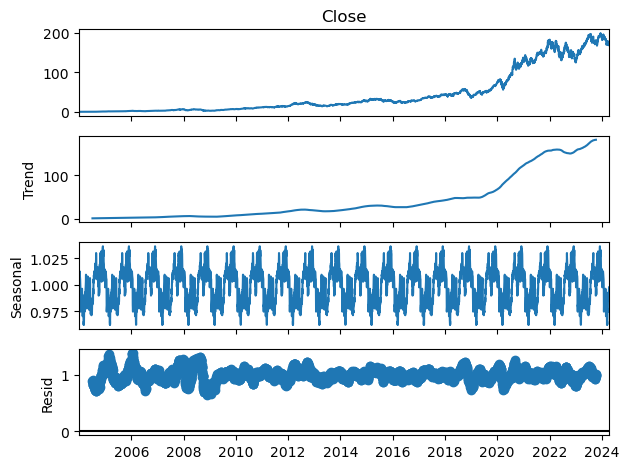

In [69]:
from statsmodels.tsa.seasonal import seasonal_decompose
components = seasonal_decompose(df['Close'], model='multiplicative', period=252)
components.plot()
plt.show()

In [70]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

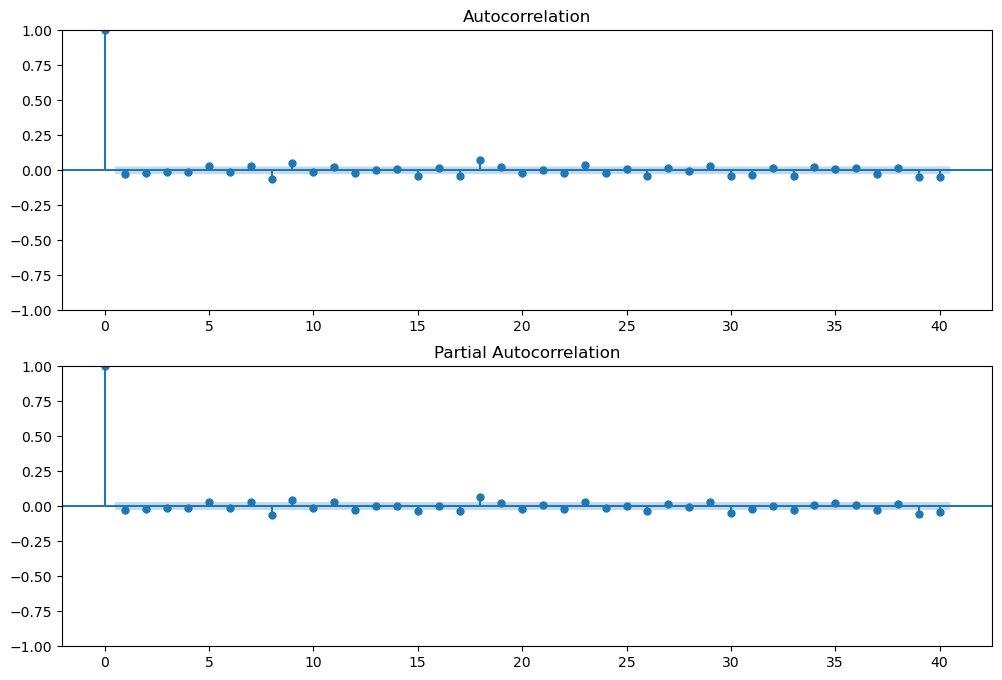

In [71]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = plot_acf(df['Close First Difference'].iloc[1:],lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = plot_pacf(df['Close First Difference'].iloc[1:],lags=40,ax=ax2)


In [72]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, r2_score

In [73]:
import warnings
warnings.filterwarnings('ignore')

# ARIMA

ARIMA(0,1,0) - MSE: 6746.9293, R2: -7.3074
ARIMA(0,1,1) - MSE: 6703.1758, R2: -7.2535
ARIMA(0,1,2) - MSE: 6740.5556, R2: -7.2995
ARIMA(0,1,3) - MSE: 6758.1591, R2: -7.3212
ARIMA(0,1,4) - MSE: 6767.1324, R2: -7.3322
ARIMA(0,1,5) - MSE: 6799.3721, R2: -7.3719
ARIMA(1,1,0) - MSE: 6720.5388, R2: -7.2749
ARIMA(1,1,1) - MSE: 6725.1110, R2: -7.2805
ARIMA(1,1,2) - MSE: 8520.1536, R2: -9.4907
ARIMA(1,1,3) - MSE: 8521.3392, R2: -9.4922
ARIMA(1,1,4) - MSE: 6715.7267, R2: -7.2689
ARIMA(1,1,5) - MSE: 6748.9518, R2: -7.3099
ARIMA(2,1,0) - MSE: 6727.3187, R2: -7.2832
ARIMA(2,1,1) - MSE: 8406.3192, R2: -9.3505
ARIMA(2,1,2) - MSE: 8521.7203, R2: -9.4926
ARIMA(2,1,3) - MSE: 8470.5201, R2: -9.4296
ARIMA(2,1,4) - MSE: 6573.0981, R2: -7.0933
ARIMA(2,1,5) - MSE: 8516.1924, R2: -9.4858
ARIMA(3,1,0) - MSE: 6755.6320, R2: -7.3181
ARIMA(3,1,1) - MSE: 8488.8697, R2: -9.4522
ARIMA(3,1,2) - MSE: 8387.1339, R2: -9.3269
ARIMA(3,1,3) - MSE: 6253.3423, R2: -6.6996
ARIMA(3,1,4) - MSE: 8019.9693, R2: -8.8748
ARIMA(3,1,5

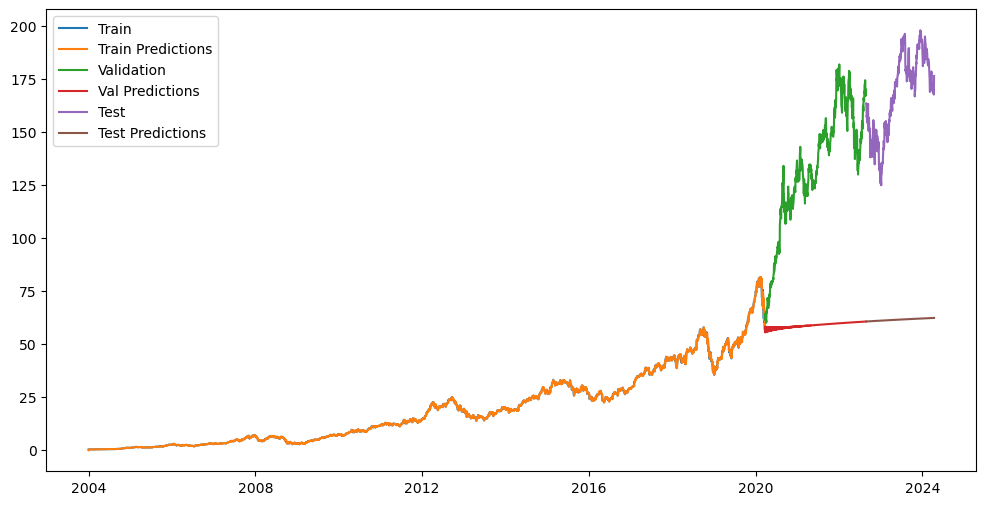

In [74]:
data = df['Close']

# Split data into train (80%), val (12%), and test (8%)
train_size = int(len(data) * 0.8)
val_size = int(len(data) * 0.12)
test_size = len(data) - train_size - val_size

train, val, test = data.iloc[0:train_size], data.iloc[train_size:train_size+val_size], data.iloc[train_size+val_size:]

best_mse = float('inf')
best_r2 = float('-inf')
best_order = None
results = []

# Iterate over p and q from 0 to 5
for p in range(6):
    for q in range(6):
        # Train the ARIMA model
        model = ARIMA(train, order=(p, 1, q))
        model_fit = model.fit()

        # Predict on the validation set
        val_pred = model_fit.predict(start=train_size, end=train_size+val_size-1)
        val_pred = pd.Series(val_pred.values, index=val.index)

        # Calculate MSE and R2
        mse = mean_squared_error(val, val_pred)
        r2 = r2_score(val, val_pred)

        results.append((p, q, mse, r2))

        # Update best model if necessary
        if mse < best_mse and r2 > best_r2:
            best_mse = mse
            best_r2 = r2
            best_order = (p, q)

        print(f'ARIMA({p},1,{q}) - MSE: {mse:.4f}, R2: {r2:.4f}')

# Print the best model
print(f'\nBest ARIMA Model: ARIMA({best_order[0]},1,{best_order[1]}) - MSE: {best_mse:.4f}, R2: {best_r2:.4f}')

# Train the best model on the combined train and val set
best_model = ARIMA(train, order=(best_order[0], 1, best_order[1]))
best_model_fit = best_model.fit()

# Predict on the test set
test_pred = best_model_fit.predict(start=train_size+val_size, end=len(data)-1)
test_pred = pd.Series(test_pred.values, index=test.index)

# Calculate MSE and R2 on the test set
test_mse = mean_squared_error(test, test_pred)
test_r2 = r2_score(test, test_pred)

print(f'\nTest Set - MSE: {test_mse:.4f}, R2: {test_r2:.4f}')

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(train.index, train, label='Train')
plt.plot(train.index, best_model_fit.predict(start=0, end=train_size-1).values, label='Train Predictions')
plt.plot(val.index, val, label='Validation')
plt.plot(val.index, best_model_fit.predict(start=train_size, end=train_size+val_size-1).values, label='Val Predictions')
plt.plot(test.index, test, label='Test')
plt.plot(test_pred.index, test_pred, label='Test Predictions')
plt.legend()
plt.show()

In [75]:
best_model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Close   No. Observations:                 4083
Model:                 ARIMA(3, 1, 3)   Log Likelihood               -2889.765
Date:                Thu, 27 Jun 2024   AIC                           5793.530
Time:                        16:16:13   BIC                           5837.731
Sample:                             0   HQIC                          5809.182
                               - 4083                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8074      0.008    -95.753      0.000      -0.824      -0.791
ar.L2          0.8320      0.009     93.509      0.000       0.815       0.849
ar.L3          0.9724      0.009    108.757      0.000       0.955       0.990
ma.L1          0.7196      0.011     67.807      0.000       0.699       0.740
ma.L2         -0.8455      0.010    -80.643      0.000      -0.866      -0.825
ma.L3         -0.8697      0.011    -80.896      0.000      -0.891      -0.849
sigma2         0.2412      0.001    173.183      0.000       0.238       0.244
===================================================================================
Ljung-Box (L1) (Q):                   7.52   Jarque-Bera (JB):            337079.23
Prob(Q):                              0.01   Prob(JB):                         0.00
Heteroskedasticity (H):              63.91   Skew:                            -1.22
Prob(H) (two-sided):                  0.00   Kurtosis:                        47.45
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

# Prophet

In [76]:
from prophet import Prophet

In [77]:
data = df[['Close']]
data.reset_index(inplace=True)
data.rename(columns = {'Date': 'ds', 'Close': 'y'}, inplace=True)

16:16:14 - cmdstanpy - INFO - Chain [1] start processing
16:16:15 - cmdstanpy - INFO - Chain [1] done processing


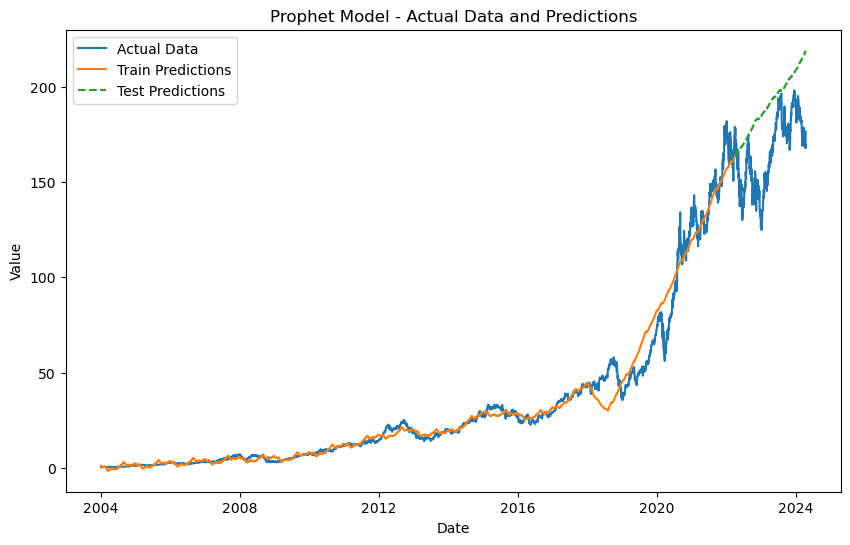

In [78]:
train_size = int(len(data) * 0.9)
train = data[:train_size]
test = data[train_size:]

# Initialize and train the Prophet model
model = Prophet()
model.fit(train)

# Create a dataframe to hold predictions for both train and test sets
future = model.make_future_dataframe(periods=len(test))
forecast = model.predict(future)

# Plot the results
plt.figure(figsize=(10, 6))

# Plot the actual data
plt.plot(data['ds'], data['y'], label='Actual Data')

# Plot the train predictions
train_forecast = forecast.iloc[:train_size]
plt.plot(train['ds'], train_forecast['yhat'], label='Train Predictions')

# Highlight the test predictions
test_forecast = forecast.iloc[train_size:]
plt.plot(test['ds'], test_forecast['yhat'], label='Test Predictions', linestyle='dashed')

# Add labels and legend
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Prophet Model - Actual Data and Predictions')
plt.legend()

# Show the plot
plt.show()

In [79]:
print(f"MSE fot yhat: {mean_squared_error(test_forecast['yhat'], test['y'])}")

print(f"R2 Score fot yhat: {r2_score(test_forecast['yhat'], test['y'])}")

MSE fot yhat: 836.8020479638403
R2 Score fot yhat: -2.691703601059882


# LSTM

In [86]:
data = df[['Close']]
data.reset_index(inplace=True)
data.rename(columns = {'Date': 'ds', 'Close': 'y'}, inplace=True)
data

,ds,y
0,2004-01-02,0.380000
1,2004-01-05,0.395893
2,2004-01-06,0.394464
3,2004-01-07,0.403393
4,2004-01-08,0.417143
...,...,...
5099,2024-04-08,168.449997
5100,2024-04-09,169.669998
5101,2024-04-10,167.779999
5102,2024-04-11,175.039993


In [87]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from keras.callbacks import EarlyStopping
from sklearn.metrics import mean_squared_error

def create_sequences(data, seq_length):
    xs, ys = [], []
    for i in range(len(data) - seq_length):
        x = data[i:i + seq_length]
        y = data[i + seq_length]
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys)

data = data.y.values.reshape(-1, 1) # Replace with your actual data
data = pd.DataFrame(data, columns=['value'])

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# Split the data into train and validation sets
validation_size = int(len(scaled_data) * 0.15)
train_data = scaled_data[:-validation_size]


validation_data = scaled_data[-(validation_size + 5):]
X_train, y_train = create_sequences(train_data, 5)
X_val, y_val = create_sequences(validation_data, 5)
    
model = Sequential()
model.add(LSTM(64, return_sequences=True, input_shape=(5, 1)))
model.add(Dropout(0.2))
model.add(LSTM(50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(1, activation='relu'))

model.compile(optimizer='adam', loss='mean_squared_error')

history = model.fit(X_train, y_train, epochs=200, batch_size=32, validation_data=(X_val, y_val), verbose=1)

val_loss = history.history['val_loss'][-1]

# Generate predictions
X_train, y_train = create_sequences(scaled_data[:-validation_size], 5)
validation_data = scaled_data[-(validation_size + 5):]
X_val, y_val = create_sequences(validation_data, 5)

train_predictions = model.predict(X_train)
val_predictions = model.predict(X_val)

train_predictions = scaler.inverse_transform(train_predictions)
y_train = scaler.inverse_transform(y_train)
val_predictions = scaler.inverse_transform(val_predictions)
y_val = scaler.inverse_transform(y_val)

# Forecast the next 12 steps
forecast_input = scaled_data[-5:].reshape(1, 5, 1)
forecast = []
for _ in range(12):
    next_pred = model.predict(forecast_input)

    forecast.append(next_pred[0, 0])
    forecast_input = np.append(forecast_input[:, 1:, :], [next_pred], axis=1)

forecast = scaler.inverse_transform(np.array(forecast).reshape(-1, 1))



Epoch 1/200
136/136 ━━━━━━━━━━━━━━━━━━━━ 12s 15ms/step - loss: 0.0057 - val_loss: 7.5104e-04
Epoch 2/200
136/136 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 3.4781e-04 - val_loss: 5.1281e-04
Epoch 3/200
136/136 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 3.4448e-04 - val_loss: 8.5417e-04
Epoch 4/200
136/136 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 2.9030e-04 - val_loss: 0.0023
Epoch 5/200
136/136 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 2.5193e-04 - val_loss: 0.0043
Epoch 6/200
136/136 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 3.0356e-04 - val_loss: 4.5830e-04
Epoch 7/200
136/136 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 2.6212e-04 - val_loss: 8.8654e-04
Epoch 8/200
136/136 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 2.4073e-04 - val_loss: 0.0048
Epoch 9/200
136/136 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 2.3554e-04 - val_loss: 6.5478e-04
Epoch 10/200
136/136 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 2.3512e-04 - val_loss: 5.5726e-04
Epoch 11/200
136/136 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss:

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━

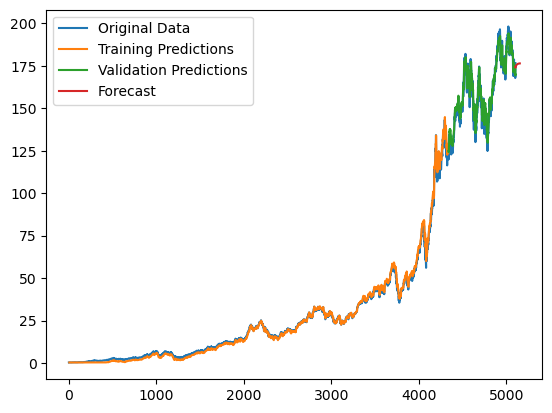

In [89]:
# Forecast the next 12 steps
forecast_input = scaled_data[-5:].reshape(1, 5, 1)
forecast = []
for _ in range(50):
    next_pred = model.predict(forecast_input)

    forecast.append(next_pred[0, 0])
    forecast_input = np.append(forecast_input[:, 1:, :], [next_pred], axis=1)

forecast = scaler.inverse_transform(np.array(forecast).reshape(-1, 1))



plt.plot(data.index, data['value'], label='Original Data')
plt.plot(range(5, len(train_predictions) + 5), train_predictions, label='Training Predictions')
plt.plot(range(len(train_predictions) + 5, len(train_predictions) + 5 + len(val_predictions)), val_predictions, label='Validation Predictions')
plt.plot(range(len(data), len(data) + len(forecast)), forecast, label='Forecast')
plt.legend()

plt.show()

In [92]:
data.iloc[:len(train_predictions)]

,value
0,0.380000
1,0.395893
2,0.394464
3,0.403393
4,0.417143
...,...
4329,125.570000
4330,124.760002
4331,120.529999
4332,119.989998


In [101]:
print(f'Training MSE: {mean_squared_error(train_predictions, data.iloc[:len(train_predictions)])}')
print(f'Test MSE: {mean_squared_error(val_predictions, data.iloc[len(train_predictions)+5:])}')

print(f'Training R2 score: {r2_score(train_predictions, data.iloc[:len(train_predictions)])}')
print(f'Test R2 score: {r2_score(val_predictions, data.iloc[len(train_predictions)+5:])}')

Training MSE: 3.1430393797416003
Test MSE: 13.109687351899334
Training R2 score: 0.9961165276106023
Test R2 score: 0.9566173352806168


# Volatility Forecast

In [346]:
df = yf.download('UBER', start='2004-01-01', end='2024-04-15')

[*********************100%%**********************]  1 of 1 completed


In [347]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-05-10,42.000000,45.000000,41.060001,41.570000,41.570000,186322500
2019-05-13,38.790001,39.240002,36.080002,37.099998,37.099998,79442400
2019-05-14,38.310001,39.959999,36.849998,39.959999,39.959999,46661100
2019-05-15,39.369999,41.880001,38.950001,41.290001,41.290001,36086100
2019-05-16,41.480000,44.060001,41.250000,43.000000,43.000000,38115500
...,...,...,...,...,...,...
2024-04-08,76.699997,76.860001,73.949997,75.029999,75.029999,22867600
2024-04-09,74.769997,75.500000,73.330002,75.139999,75.139999,13766800
2024-04-10,74.400002,75.305000,73.535004,74.349998,74.349998,12533900


<Axes: xlabel='Date'>

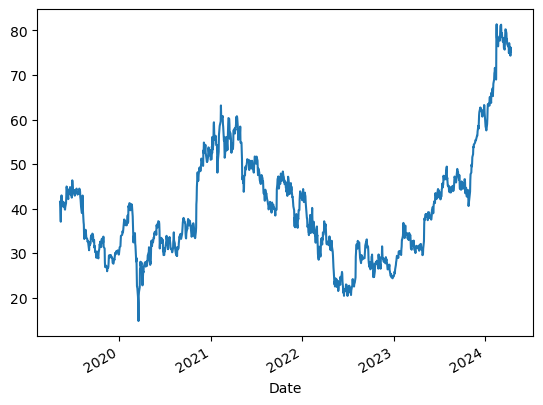

In [348]:
df.Close.plot()

In [349]:
returns = 100 * df.Close.pct_change().dropna()

Text(0.5, 1.0, 'MSFT Returns')

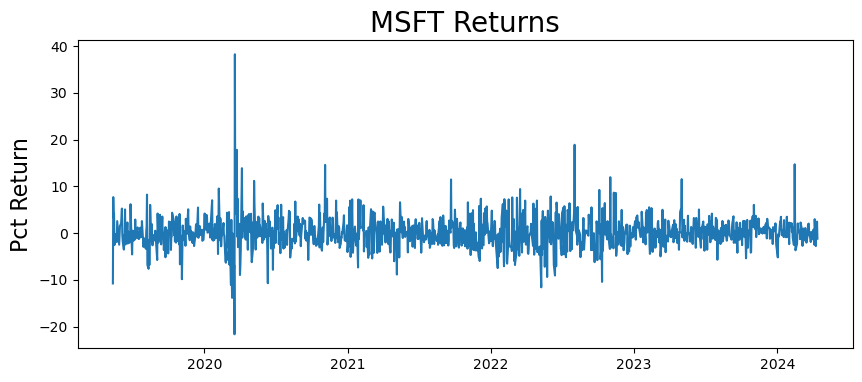

In [350]:
plt.figure(figsize=(10,4))
plt.plot(returns)
plt.ylabel('Pct Return', fontsize=16)
plt.title('MSFT Returns', fontsize=20)

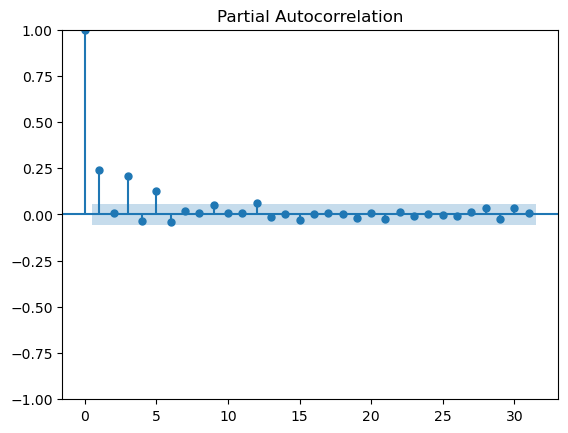

In [351]:
plot_pacf(returns**2)
plt.show()

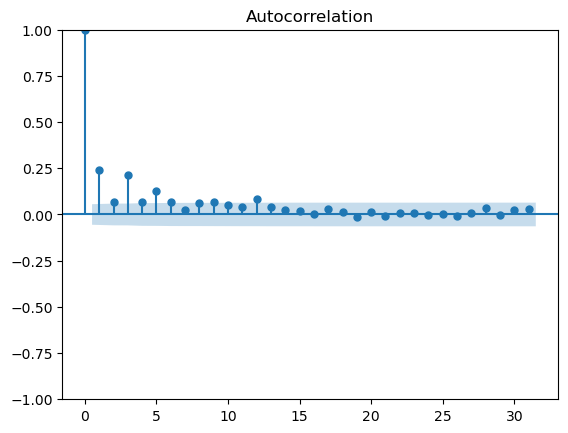

In [352]:
plot_acf(returns**2)
plt.show()

In [353]:
from arch import arch_model

## Try GARCH(2, 2)

In [354]:
model = arch_model(returns, p=1, q=1)

In [355]:
model_fit = model.fit()

Iteration:      1,   Func. Count:      6,   Neg. LLF: 6431.683754666239
Iteration:      2,   Func. Count:     13,   Neg. LLF: 5554.7834064208855
Iteration:      3,   Func. Count:     21,   Neg. LLF: 3347.1985348855433
Iteration:      4,   Func. Count:     28,   Neg. LLF: 4549.300767313959
Iteration:      5,   Func. Count:     34,   Neg. LLF: 3351.3746327215376
Iteration:      6,   Func. Count:     40,   Neg. LLF: 3172.8352904384183
Iteration:      7,   Func. Count:     45,   Neg. LLF: 3172.834110512084
Iteration:      8,   Func. Count:     50,   Neg. LLF: 3172.833665031919
Iteration:      9,   Func. Count:     55,   Neg. LLF: 3172.8336581006197
Iteration:     10,   Func. Count:     59,   Neg. LLF: 3172.8336581012118
Optimization terminated successfully    (Exit mode 0)
            Current function value: 3172.8336581006197
            Iterations: 10
            Function evaluations: 59
            Gradient evaluations: 10


In [356]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                  Close   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -3172.83
Distribution:                  Normal   AIC:                           6353.67
Method:            Maximum Likelihood   BIC:                           6374.16
                                        No. Observations:                 1239
Date:                Thu, Jun 27 2024   Df Residuals:                     1238
Time:                        21:04:49   Df Model:                            1
                                Mean Model                                
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu             0.2087  8.253e-02      2.529  1.144e-02 [4.697e-02,  0.370]
                             Volatility Model                             
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
omega          1.1256      0.794      1.418      0.156   [ -0.431,  2.682]
alpha[1]       0.1619  7.465e-02      2.169  3.010e-02 [1.559e-02,  0.308]
beta[1]        0.7407      0.129      5.739  9.509e-09   [  0.488,  0.994]
==========================================================================

Covariance estimator: robust
"""

In [357]:
rolling_predictions = []
test_size = 365*3

for i in range(test_size):
    train = returns[:-(test_size-i)]
    model = arch_model(train, p=2, q=2)
    model_fit = model.fit(disp='off')
    pred = model_fit.forecast(horizon=1)
    rolling_predictions.append(np.sqrt(pred.variance.values[-1,:][0]))


In [358]:
rolling_predictions = pd.Series(rolling_predictions, index=returns.index[-test_size:])

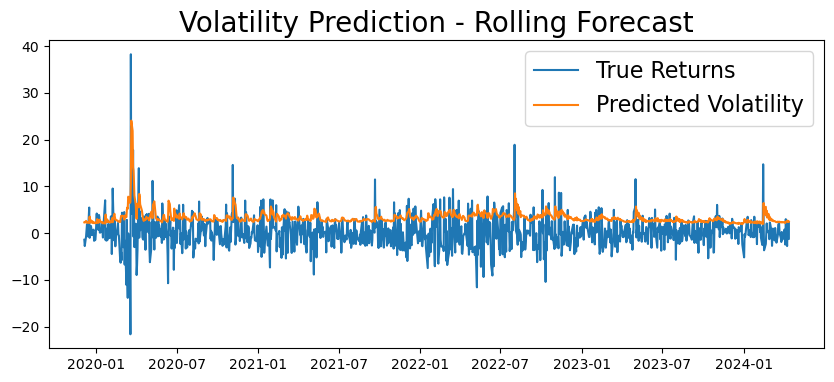

In [359]:
plt.figure(figsize=(10,4))
true, = plt.plot(returns[-test_size:])
preds, = plt.plot(rolling_predictions)
plt.title('Volatility Prediction - Rolling Forecast', fontsize=20)
plt.legend(['True Returns', 'Predicted Volatility'], fontsize=16)


## NIFTY 50 Volatility

In [360]:
df = yf.download('^BSESN', start='2004-01-01', end='2024-04-15')

[*********************100%%**********************]  1 of 1 completed


In [361]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2004-01-02,5944.229980,6034.379883,5944.229980,6026.589844,6026.589844,31400
2004-01-05,6050.479980,6078.109863,5964.649902,6039.000000,6039.000000,33600
2004-01-06,6068.680176,6121.200195,5916.330078,5943.640137,5943.640137,37600
2004-01-07,5970.350098,5985.299805,5870.549805,5957.020020,5957.020020,36200
2004-01-08,5992.100098,6118.620117,5992.100098,6108.540039,6108.540039,31600
...,...,...,...,...,...,...
2024-04-05,74287.023438,74361.109375,73946.921875,74248.218750,74248.218750,11300
2024-04-08,74555.437500,74869.296875,74410.070312,74742.500000,74742.500000,8300
2024-04-09,75124.281250,75124.281250,74603.367188,74683.703125,74683.703125,41000


<Axes: xlabel='Date'>

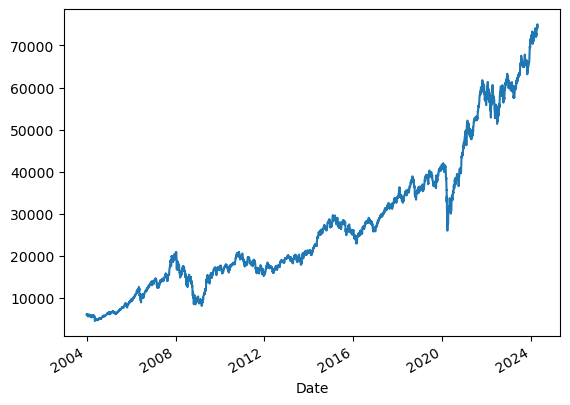

In [362]:
df.Close.plot()

In [363]:
returns = 100 * df.Close.pct_change().dropna()

Text(0.5, 1.0, 'SENSEX Returns')

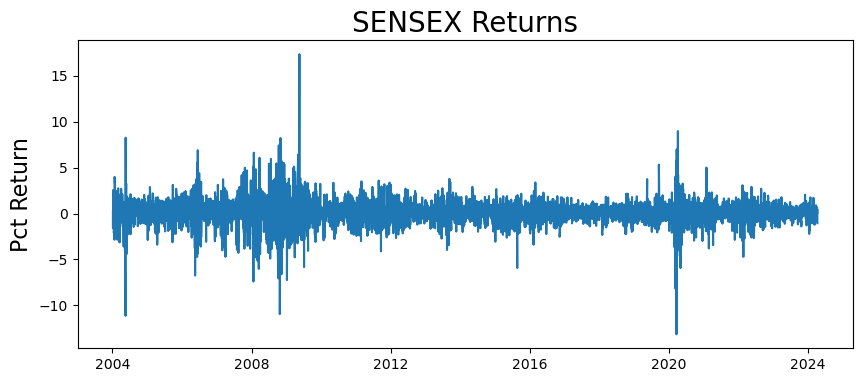

In [364]:
plt.figure(figsize=(10,4))
plt.plot(returns)
plt.ylabel('Pct Return', fontsize=16)
plt.title('SENSEX Returns', fontsize=20)

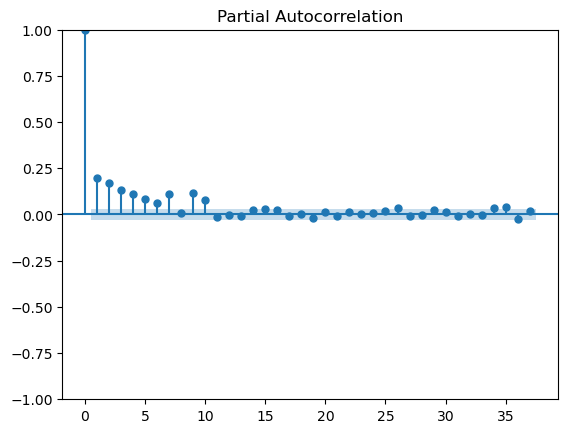

In [365]:
plot_pacf(returns**2)
plt.show()

In [366]:
model = arch_model(returns, p=3, q=3)

In [367]:
model_fit = model.fit()

Iteration:      1,   Func. Count:     10,   Neg. LLF: 33874.32793223372
Iteration:      2,   Func. Count:     24,   Neg. LLF: 7105764.499818575
Iteration:      3,   Func. Count:     35,   Neg. LLF: 8967.385884823456
Iteration:      4,   Func. Count:     47,   Neg. LLF: 7756.08483496583
Iteration:      5,   Func. Count:     57,   Neg. LLF: 7579.915438047727
Iteration:      6,   Func. Count:     68,   Neg. LLF: 7579.522526350595
Iteration:      7,   Func. Count:     79,   Neg. LLF: 7625.83923002295
Iteration:      8,   Func. Count:     90,   Neg. LLF: 7518.568953153193
Iteration:      9,   Func. Count:    100,   Neg. LLF: 7512.795464731852
Iteration:     10,   Func. Count:    109,   Neg. LLF: 7513.669839020919
Iteration:     11,   Func. Count:    120,   Neg. LLF: 7512.838335087936
Iteration:     12,   Func. Count:    130,   Neg. LLF: 7512.63431384589
Iteration:     13,   Func. Count:    140,   Neg. LLF: 7512.599015989256
Iteration:     14,   Func. Count:    149,   Neg. LLF: 7512.59735444

In [368]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                  Close   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -7512.60
Distribution:                  Normal   AIC:                           15041.2
Method:            Maximum Likelihood   BIC:                           15093.3
                                        No. Observations:                 4987
Date:                Thu, Jun 27 2024   Df Residuals:                     4986
Time:                        21:09:11   Df Model:                            1
                                Mean Model                                
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu             0.0907  1.407e-02      6.449  1.129e-10 [6.315e-02,  0.118]
                              Volatility Model                              
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega          0.0500  1.437e-02      3.482  4.985e-04 [2.187e-02,7.821e-02]
alpha[1]       0.0996  2.290e-02      4.350  1.361e-05   [5.473e-02,  0.144]
alpha[2]       0.0716  3.267e-02      2.190  2.850e-02   [7.528e-03,  0.136]
alpha[3]       0.0998  1.797e-02      5.556  2.765e-08   [6.460e-02,  0.135]
beta[1]    7.2668e-18      0.290  2.502e-17      1.000     [ -0.569,  0.569]
beta[2]        0.0000      0.146      0.000      1.000     [ -0.285,  0.285]
beta[3]        0.7057      0.124      5.692  1.257e-08     [  0.463,  0.949]
============================================================================

Covariance estimator: robust
"""

In [369]:
rolling_predictions = []
test_size = 365*5

for i in range(test_size):
    train = returns[:-(test_size-i)]
    model = arch_model(train, p=3, q=3)
    model_fit = model.fit(disp='off')
    pred = model_fit.forecast(horizon=1)
    rolling_predictions.append(np.sqrt(pred.variance.values[-1,:][0]))


In [370]:
rolling_predictions = pd.Series(rolling_predictions, index=returns.index[-365*5:])

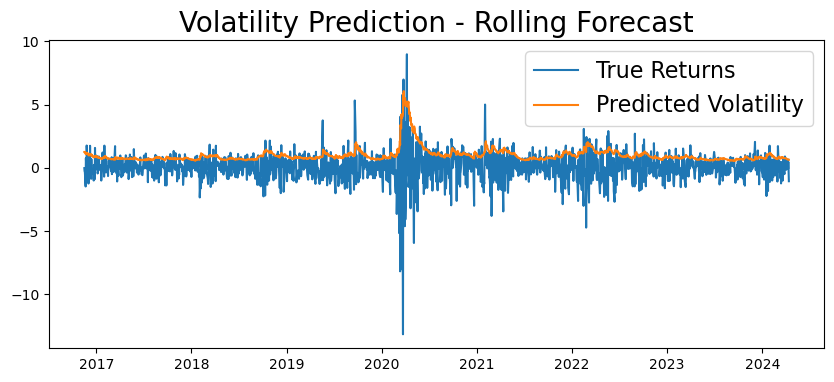

In [371]:
plt.figure(figsize=(10,4))
true, = plt.plot(returns[-365*5:])
preds, = plt.plot(rolling_predictions)
plt.title('Volatility Prediction - Rolling Forecast', fontsize=20)
plt.legend(['True Returns', 'Predicted Volatility'], fontsize=16)
